## Carga librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install skimpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 69.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: polars
    Found existing installation: polars 1.6.0
    Uninstalling polars-1.6.0:
      Successfully uninstalled polars-1.6.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykern

In [3]:
import pandas as pd
import numpy as np
import math
from scipy.stats import randint, uniform

# plots
import matplotlib.pyplot as plt
# %matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

# misc
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# Summary stats
import skimpy as sk

## Carga datos

In [4]:
# MODULES PATH
import sys
import os

# Get the absolute path of the current notebook
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct the path to your modules directory
modules_path = os.path.join(current_dir, '/content/drive/MyDrive/TFM_Retail_Repo/03_Clustering')

# Add the path to sys.path
sys.path.append(modules_path)


### Carga Modules

In [5]:
from modules.get_data import get_data
from modules import time_series_analisis as tma

**Transformaciones previas**

In [6]:
# Añadimos algunas columnas al df de ventas diarias principal y cambiamos el nombre
'''
# Daily sales
df = get_data('exp_day_sales_240911.csv')

# Cambiamos nombres de columnas
df = df.rename(columns={ #ejercicio, semana, unidades, cifra
    'fecha': 'date',
    'ejercicio': 'year',
    'semana': 'week',
    'unidades': 'units',
    'cifra': 'raw_earn',
    'mes': 'month'
    })

df['date'] = pd.to_datetime(df['date'])

# Obtener el nombre del día y numero de dia de la semana
df['day_name'] = df['date'].dt.day_name()
df['weekday_number'] = df['date'].dt.dayofweek

display(df.head())

# Obtenemos df calendar
df_cal = get_data('exp_calendar.csv')

df_cal['fecha'] = pd.to_datetime(df_cal['fecha'])

df_cal = df_cal.rename(columns={
    'fecha': 'date'
    })

# Añadimos la columna event al df principal de ventas diarias
df = df.merge(df_cal[['date', 'event']], on=['date'], how='left')

# Guardamos df como csv
from google.colab import files

file_name = 'daily_sales_with_events.csv'

# Exportar DataFrame a CSV
df.to_csv(file_name, index=False)

# Descargar el archivo CSV
files.download(file_name)
'''

"\n# Daily sales\ndf = get_data('exp_day_sales_240911.csv')\n\n# Cambiamos nombres de columnas\ndf = df.rename(columns={ #ejercicio, semana, unidades, cifra\n    'fecha': 'date',\n    'ejercicio': 'year',\n    'semana': 'week',\n    'unidades': 'units',\n    'cifra': 'raw_earn',\n    'mes': 'month'\n    })\n\ndf['date'] = pd.to_datetime(df['date'])\n\n# Obtener el nombre del día y numero de dia de la semana\ndf['day_name'] = df['date'].dt.day_name()\ndf['weekday_number'] = df['date'].dt.dayofweek\n\ndisplay(df.head())\n\n# Obtenemos df calendar\ndf_cal = get_data('exp_calendar.csv')\n\ndf_cal['fecha'] = pd.to_datetime(df_cal['fecha'])\n\ndf_cal = df_cal.rename(columns={\n    'fecha': 'date'\n    })\n\n# Añadimos la columna event al df principal de ventas diarias\ndf = df.merge(df_cal[['date', 'event']], on=['date'], how='left')\n\n# Guardamos df como csv\nfrom google.colab import files\n\nfile_name = 'daily_sales_with_events.csv'\n\n# Exportar DataFrame a CSV\ndf.to_csv(file_name, inde

In [7]:
# Cargamos df de ventas diarias modificado
df = get_data('daily_sales_with_events.csv')

display(df.head())

item store_code        date  units  year  week  sell_price  \
0  ACCESORIES_1_008      NYC_1  2011-01-29     12  2011     4      0.6118   
1  ACCESORIES_1_009      NYC_1  2011-01-29      2  2011     4      2.0748   
2  ACCESORIES_1_015      NYC_1  2011-01-29      4  2011     4      0.9310   
3  ACCESORIES_1_016      NYC_1  2011-01-29      5  2011     4      0.9310   
4  ACCESORIES_1_022      NYC_1  2011-01-29      2  2011     4      9.1238   

   raw_earn  month  day_name  weekday_number event  
0    7.3416      1  Saturday               5   NaN  
1    4.1496      1  Saturday               5   NaN  
2    3.7240      1  Saturday               5   NaN  
3    4.6550      1  Saturday               5   NaN  
4   18.2476      1  Saturday               5   NaN

# INFORME

In [8]:
# Convertimos 'fecha' a date
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

# Rellenamos events Nan con 'None'
df['event'] = df['event'].fillna(value='None')

# Aseguramos orden por fecha del df
df = df.sort_values('date',ascending=True)

# Encontrar la fecha mínima y máxima
min_date = df['date'].min()
max_date = df['date'].max()

# Calcular la diferencia en días
days_diff = (max_date - min_date).days + 1  # +1 para incluir ambos extremos

# Calcular la diferencia en meses
months_diff = round(days_diff / 30.5)  # Asumiendo un mes promedio de 30.5 días

print(f"Fecha mínima: {min_date}")
print(f"Fecha máxima: {max_date}")
print(f"Días de datos analizados: {days_diff}")
print(f"Meses de datos analizados: {months_diff}")
print(f"Fechas unicas que tenemos: {df['date'].nunique()}")
print(f"¿Faltan fechas?: {days_diff - df['date'].nunique()}")

Fecha mínima: 2011-01-29 00:00:00
Fecha máxima: 2016-04-24 00:00:00
Días de datos analizados: 1913
Meses de datos analizados: 63
Fechas unicas que tenemos: 1913
¿Faltan fechas?: 0


In [9]:
# Skim describe
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 18550276 │ │ int64       │ 5     │                                                        │
│ │ Number of columns │ 12       │ │ string      │ 4     │                                                        │
│ └───────────────────┴──────────┘ │ float64     │ 2     │                                                        │
│                                  │ datetime64  │ 1     │                                                        │
│                                  └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ units             │   0 │      0 │   3.541 │  6.214 │      1 │      1 │      2 │      4 │    763 │    ▇    │  │
│ │ year              │   0 │      0 │    2014 │  1.503 │   2011 │   2012 │   2014 │   2015 │   2016 │ ▅▆▇▇▇▃  │  │
│ │ week              │   0 │      0 │   25.84 │  15.13 │      1 │     12 │     25 │     39 │     53 │ ▇▇▆▇▇▆  │  │
│ │ sell_price        │   0 │      0 │   4.748 │  3.936 │  0.012 │  2.376 │  3.576 │  5.976 │  134.1 │    ▇    │  │
│ │ raw_earn          │   0 │      0 │   12.45 │  18.29 │  0.012 │  4.176 │  7.387 │   14.3 │   2597 │    ▇    │  │
│ │ month             │   0 │      0 │   6.347 │  3.459 │      1 │      3 │      6 │      9 │     12 │ ▇▇▇▇▇▇  │  │
│ │ weekday_number    │   0 │      0 │   3.104 │  2.025 │      0 │      1 │      3 │      5 │      6 │ ▃▃▃▃▃▇  │  │
│ └───────────────────┴─────┴────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2011-01-29      │     2016-04-24      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ item                      │       0 │          0 │                            1 │                 18550276 │  │
│ │ store_code                │       0 │          0 │                            1 │                 18550276 │  │
│ │ day_name                  │       0 │          0 │  

In [10]:
## Evolucion numero de productos por año
# Contar productos únicos por año
unique_items_per_year = df.groupby('year')['item'].nunique()

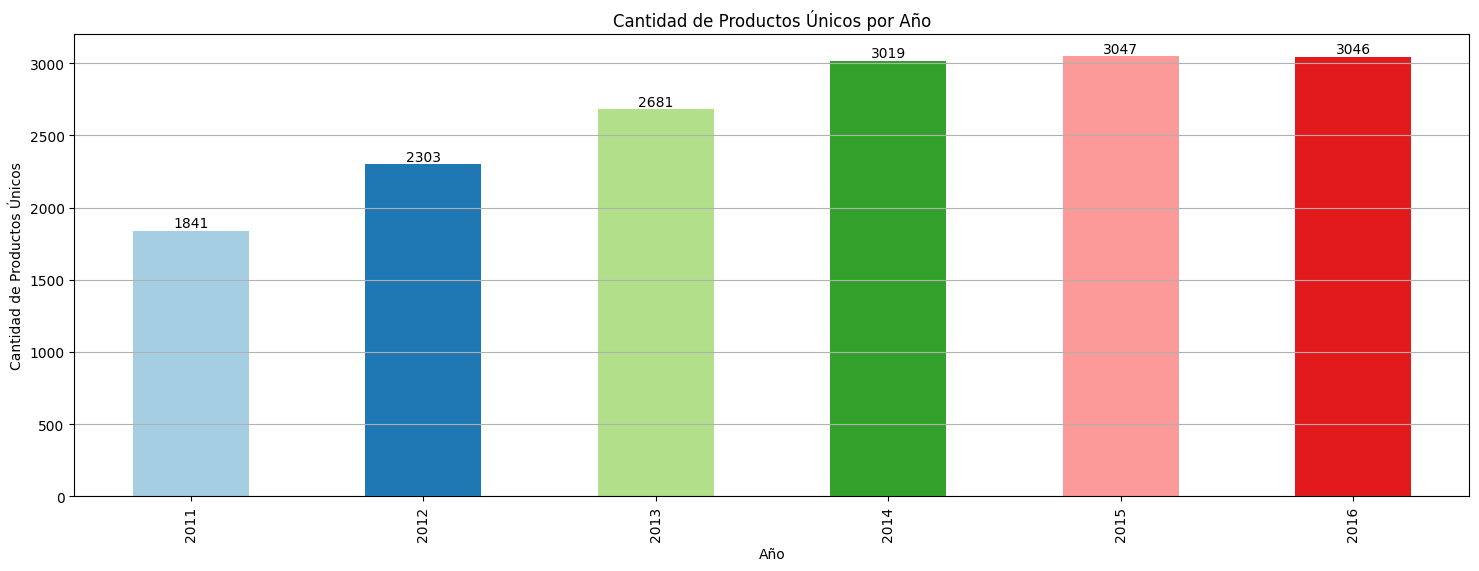

In [11]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(18, 6))

# Crear el gráfico de barras
bars = unique_items_per_year.plot(kind='bar', color=plt.cm.Paired(range(len(unique_items_per_year))))

# Título y etiquetas
plt.title('Cantidad de Productos Únicos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Productos Únicos')

# Mostrar el total de items únicos encima de cada barra
for index, value in enumerate(unique_items_per_year):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, axis='y')
plt.show()

# Time Series analisis

## Evolucion ventas diarias

In [12]:
# Filtramos df por los 2 últimos años
df_origin = df.copy() # Copia para no perder original

df = df[df['year'].isin([2014, 2015, 2016])]

### Por cluster de productos

#### Funciones

In [13]:
FIGSIZE = (15, 8)

# Función para obtener una paleta de colores consistente basada en los valores únicos de cluster_name
def get_cluster_palette(data, group_col):
    unique_clusters = data[group_col].unique()
    palette = sns.color_palette('hls', len(unique_clusters))  # Usa 'Set2' o cualquier otra paleta
    return dict(zip(unique_clusters, palette))

# Función para graficar el porcentaje de una métrica agrupada por año y cluster_name
def plot_percentage_bars(data, year_col, group_col, value_col, title, ylabel, figsize=(12, 5)):
    """
    Plotea un gráfico de barras mostrando el porcentaje de una métrica agrupada por año y cluster_name.

    Parámetros:
    data : DataFrame
        El DataFrame que contiene los datos.
    year_col : str
        El nombre de la columna que contiene los años.
    group_col : str
        El nombre de la columna que contiene los grupos (ej. cluster_name).
    value_col : str
        El nombre de la columna que contiene los valores que se van a graficar.
    title : str
        Título del gráfico.
    ylabel : str
        Etiqueta para el eje Y.
    figsize : tuple
        Tamaño de la figura del gráfico.
    """
    # Agrupar los datos por el año y el grupo, y sumar los valores
    grouped_data = data.groupby([year_col, group_col]).agg({value_col: 'sum'}).reset_index()

    # Calcular el total anual para cada año
    yearly_totals = grouped_data.groupby(year_col)[value_col].transform('sum')

    # Calcular el porcentaje para cada cluster dentro de cada año
    grouped_data['percentage'] = (grouped_data[value_col] / yearly_totals) * 100

    # Generar una paleta de colores consistente para los clusters
    palette = get_cluster_palette(data, 'cluster_name')

    # Crear el gráfico de barras
    plt.figure(figsize=figsize)
    sns.barplot(
        x=year_col, y='percentage', hue=group_col, data=grouped_data, palette=palette
    )

    # Añadir los porcentajes en la parte superior de cada barra
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%', label_type='edge')

    # Título y etiquetas
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Año')
    plt.legend(title=group_col, loc='upper right')
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Función para graficar la evolución de una métrica agrupada por 'cluster_name'
def plot_evolution(data, date_col, group_col, value_col, title, ylabel, linewidth=1, figsize=(12, 5), agg='sum'):
    """
    Plotea la evolución de una métrica agrupada por una columna de agrupación.

    Parámetros:
    data : DataFrame
        El DataFrame que contiene los datos.
    date_col : str
        El nombre de la columna que contiene las fechas.
    group_col : str
        El nombre de la columna que contiene los grupos (ej. cluster_name).
    value_col : str
        El nombre de la columna que contiene los valores que se van a graficar.
    title : str
        Título del gráfico.
    ylabel : str
        Etiqueta para el eje Y.
    linewidth : int
        Grosor de las líneas en el gráfico.
    figsize : tuple
        Tamaño de la figura del gráfico.
    """
    # Asegurarse de que la columna de fecha es de tipo datetime
    data[date_col] = pd.to_datetime(data[date_col])

    # Agrupar los datos por la fecha y el grupo, y sumar los valores de la columna a graficar
    grouped_data = data.groupby([date_col, group_col]).agg({value_col: agg}).reset_index()

    # Generar una paleta de colores consistente para los clusters
    palette = get_cluster_palette(data, 'cluster_name')

    plt.figure(figsize=figsize)
    sns.lineplot(
        x=date_col, y=value_col, hue=group_col, data=grouped_data, palette=palette, linewidth=linewidth
    )

    # Añadir líneas verticales discontinuas para los días de eventos
    event_days = data[data['event'] != 'None']

    # Añadir líneas verticales discontinuas en gris con grosor 0.5 para todos los eventos
    plt.vlines(event_days[date_col].unique(), ymin=plt.ylim()[0], ymax=plt.ylim()[1], color='gray', linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel(ylabel)
    plt.legend(title=group_col)
    plt.show()


#### **Ventas: raw_earn**

In [14]:
# Borramos columnas de cluster de productos sobre performance general de ventas
# df = df.drop(columns=['cluster', 'cluster_name'])

# cargamos items con clusters
cl_items_rawearn = get_data('_clusters/items_clusters_raw_earn.csv')

cl_items_rawearn = cl_items_rawearn.rename(columns={'Cluster':'cluster'})

# Añadimos la columna event al df principal de ventas diarias
df = df.merge(cl_items_rawearn[['item', 'cluster', 'cluster_name']], on=['item'], how='left')

display(df.head())

item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        0   
1   13.2202      1  Wednesday               2  NewYear        0   
2    8.8844      1  Wednesday               2  NewYear        3   
3    2.7664      1  Wednesday               2  NewYear        0   
4    3.8304      1  Wednesday               2  NewYear        0   

                                        cluster_name  
0                     Productos con bajo rendimiento  
1                     Productos con bajo rendimiento  
2  Productos con rendimiento superior pero con va...  
3                     Productos con bajo rendimiento  
4                     Productos con bajo rendimiento

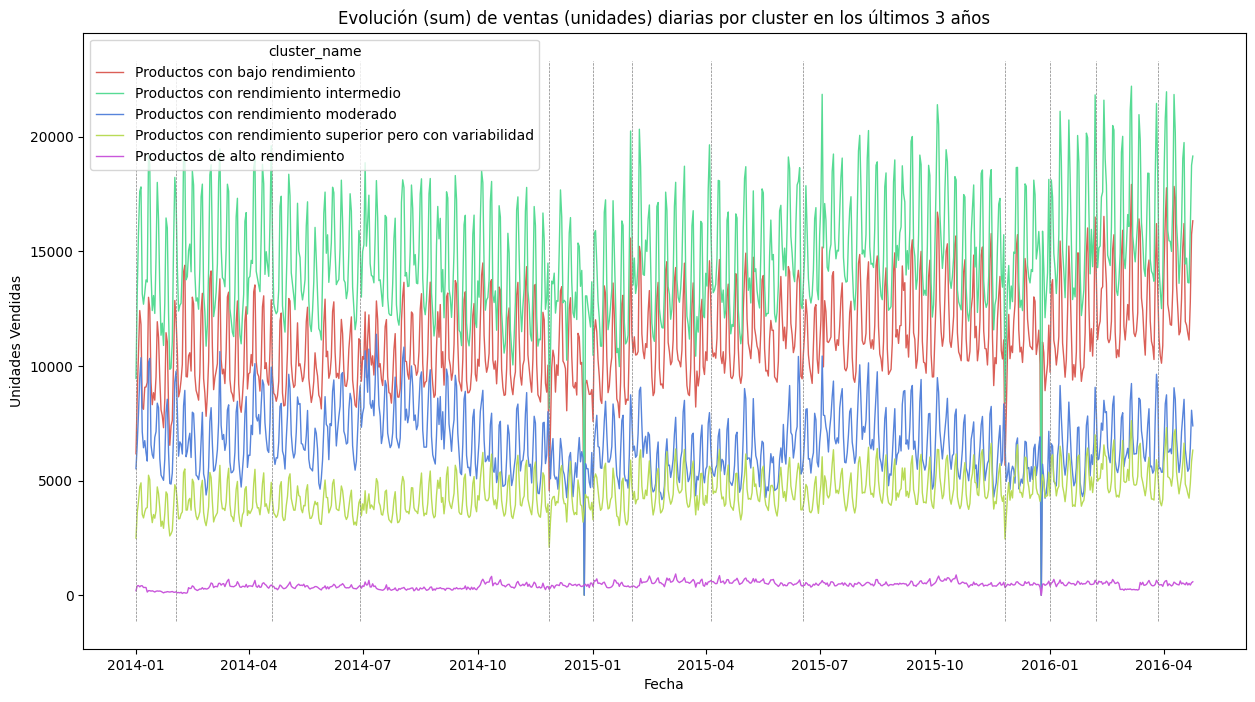

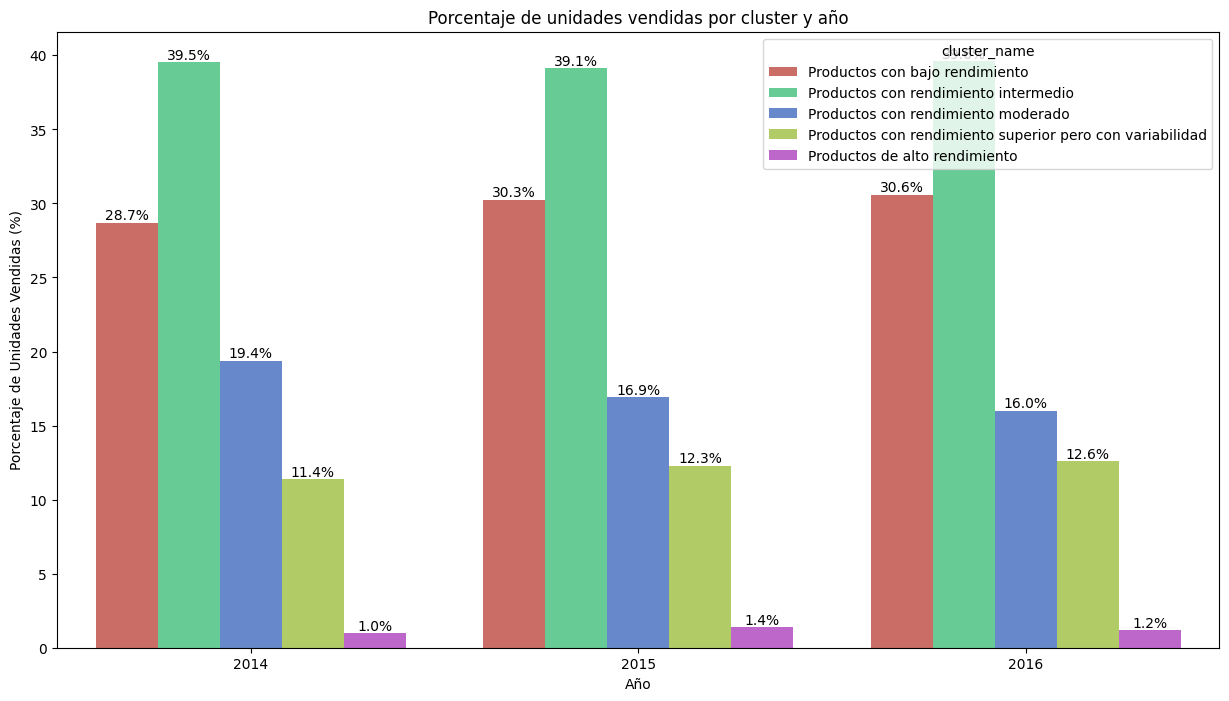

In [15]:
# Llamada a la función para graficar unidades vendidas
plot_evolution(
    data=df,
    date_col='date',
    group_col='cluster_name',
    value_col='units',
    title='Evolución (sum) de ventas (unidades) diarias por cluster en los últimos 3 años',
    ylabel='Unidades Vendidas',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de unidades vendidas por año
plot_percentage_bars(
    data=df,
    year_col='year',
    group_col='cluster_name',
    value_col='units',
    title='Porcentaje de unidades vendidas por cluster y año',
    ylabel='Porcentaje de Unidades Vendidas (%)',
    figsize=FIGSIZE

  )

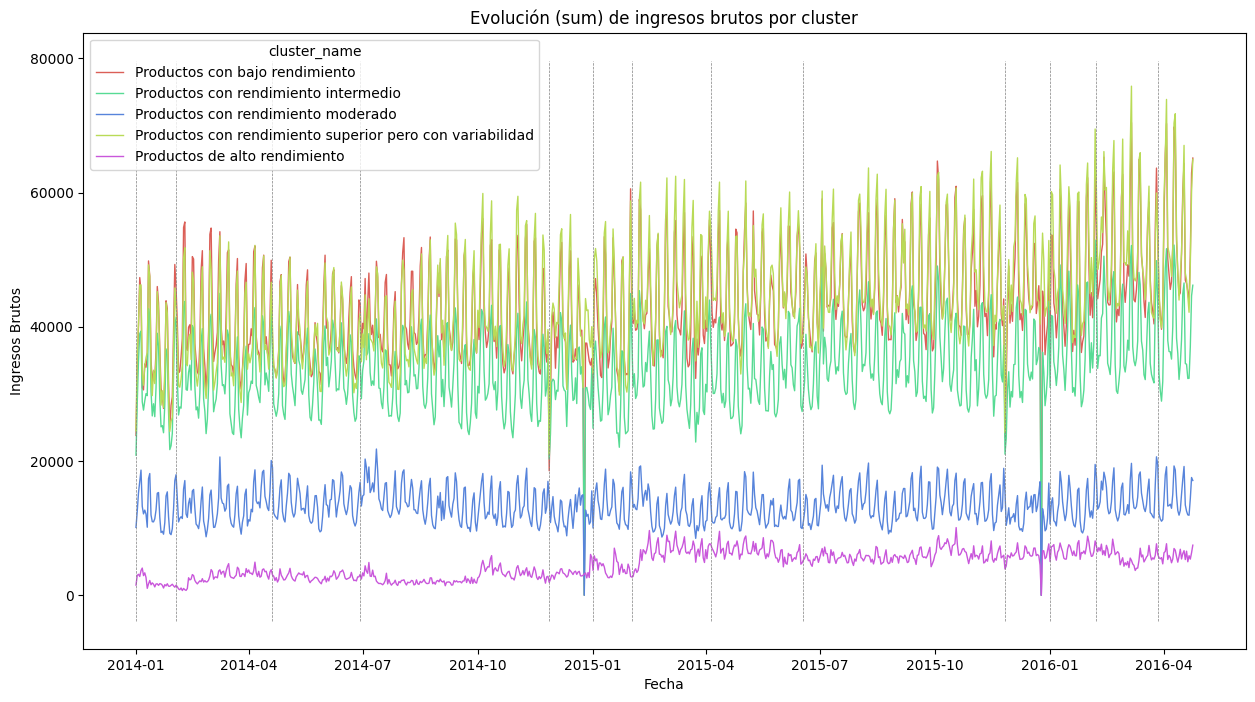

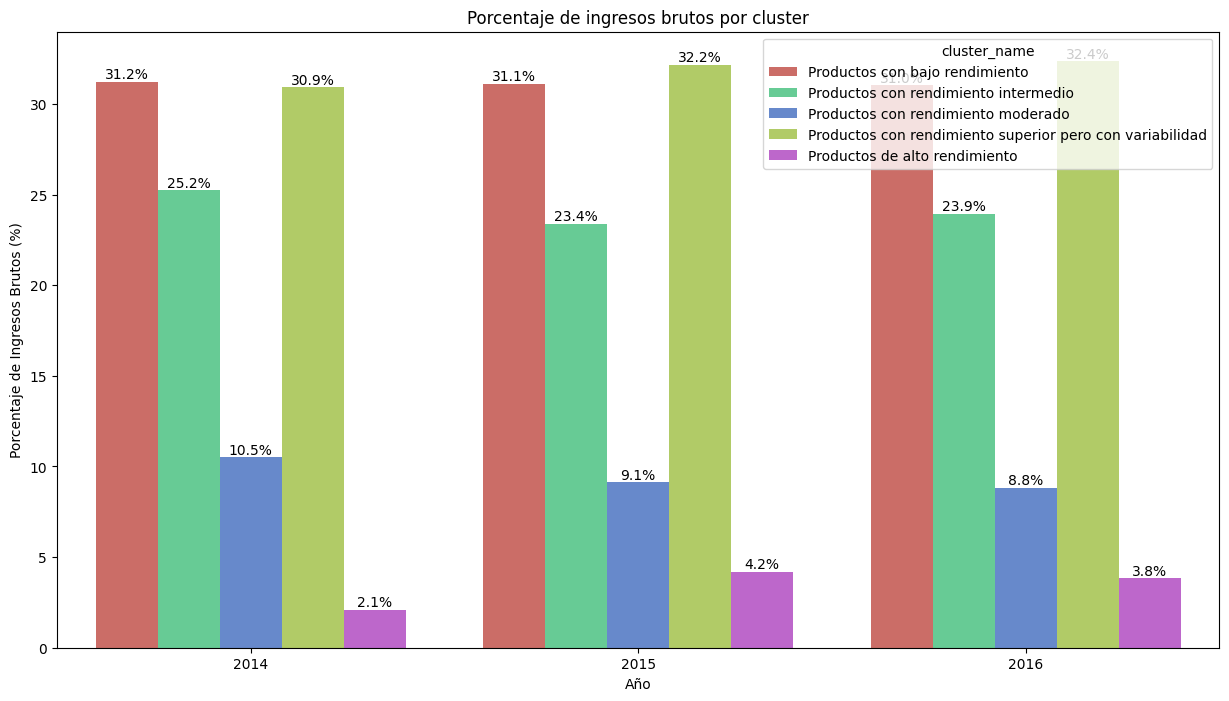

In [16]:
df_filt = df[df['year'].isin([2014, 2015, 2016])]

# Llamada a la función para graficar ingresos brutos
plot_evolution(
    data=df_filt,
    date_col='date',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Evolución (sum) de ingresos brutos por cluster',
    ylabel='Ingresos Brutos',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de ingresos brutos por año
plot_percentage_bars(
    data=df_filt,
    year_col='year',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Porcentaje de ingresos brutos por cluster',
    ylabel='Porcentaje de Ingresos Brutos (%)',
    figsize=FIGSIZE
)

#### **Influencia eventos sobre ventas**

In [17]:
# Borramos columnas de cluster de productos sobre performance general de ventas
df = df.drop(columns=['cluster', 'cluster_name'])

# Cargamos clusters influencia eventos sobre ventas
cl_items_events = get_data('_clusters/items_clusters_events_influence_sales.csv')

# Añadimos columnas a df principal
df = df.merge(cl_items_events[['item', 'cluster', 'cluster_name']], on=['item'], how='left')

display(df.head())


item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        0   
1   13.2202      1  Wednesday               2  NewYear        0   
2    8.8844      1  Wednesday               2  NewYear        0   
3    2.7664      1  Wednesday               2  NewYear        0   
4    3.8304      1  Wednesday               2  NewYear        0   

                               cluster_name  
0  Productos con baja influencia de eventos  
1  Productos con baja influencia de eventos  
2  Productos con baja influencia de eventos  
3  Productos con baja influencia de eventos  
4  Productos con baja influencia de eventos

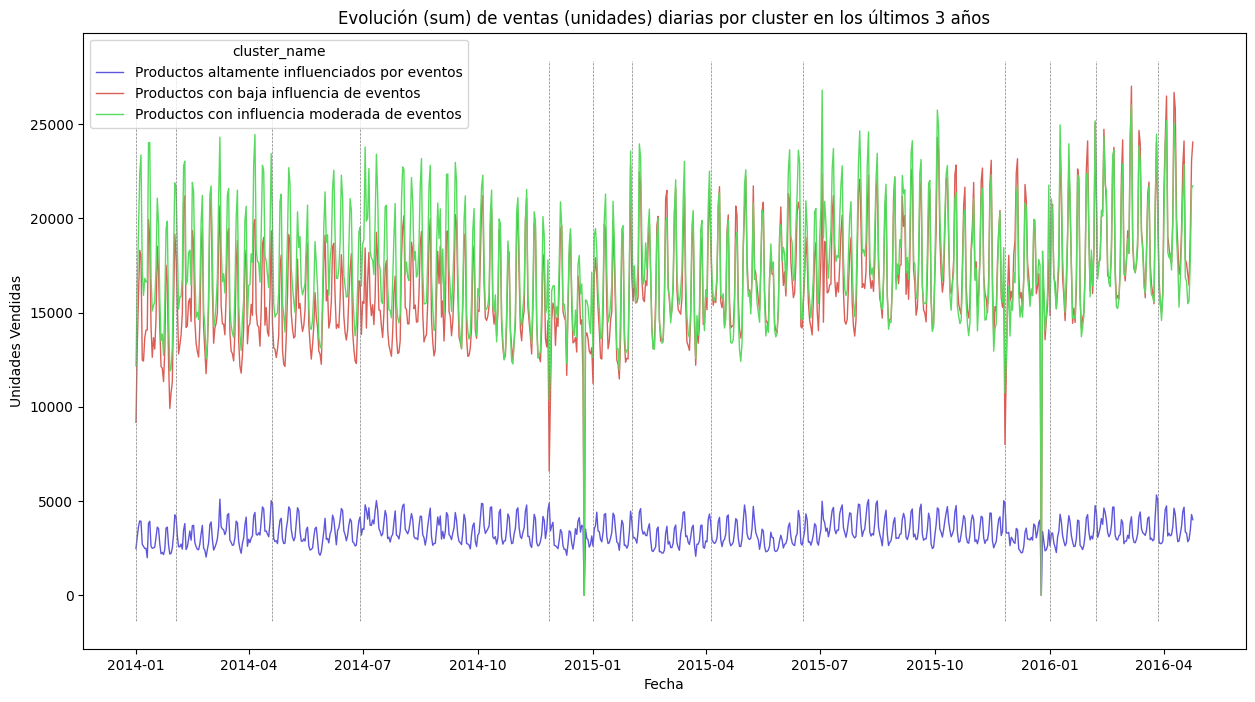

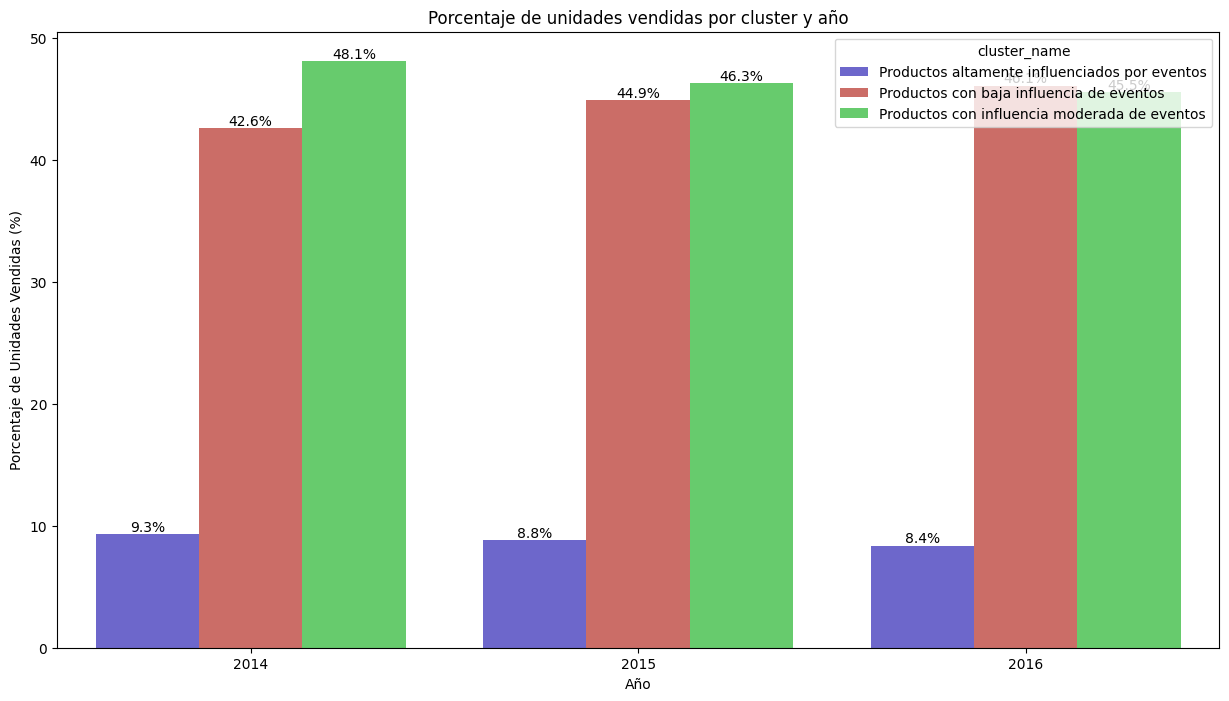

In [18]:
# Llamada a la función para graficar unidades vendidas
plot_evolution(
    data=df,
    date_col='date',
    group_col='cluster_name',
    value_col='units',
    title='Evolución (sum) de ventas (unidades) diarias por cluster en los últimos 3 años',
    ylabel='Unidades Vendidas',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de unidades vendidas por año
plot_percentage_bars(
    data=df,
    year_col='year',
    group_col='cluster_name',
    value_col='units',
    title='Porcentaje de unidades vendidas por cluster y año',
    ylabel='Porcentaje de Unidades Vendidas (%)',
    figsize=FIGSIZE

  )

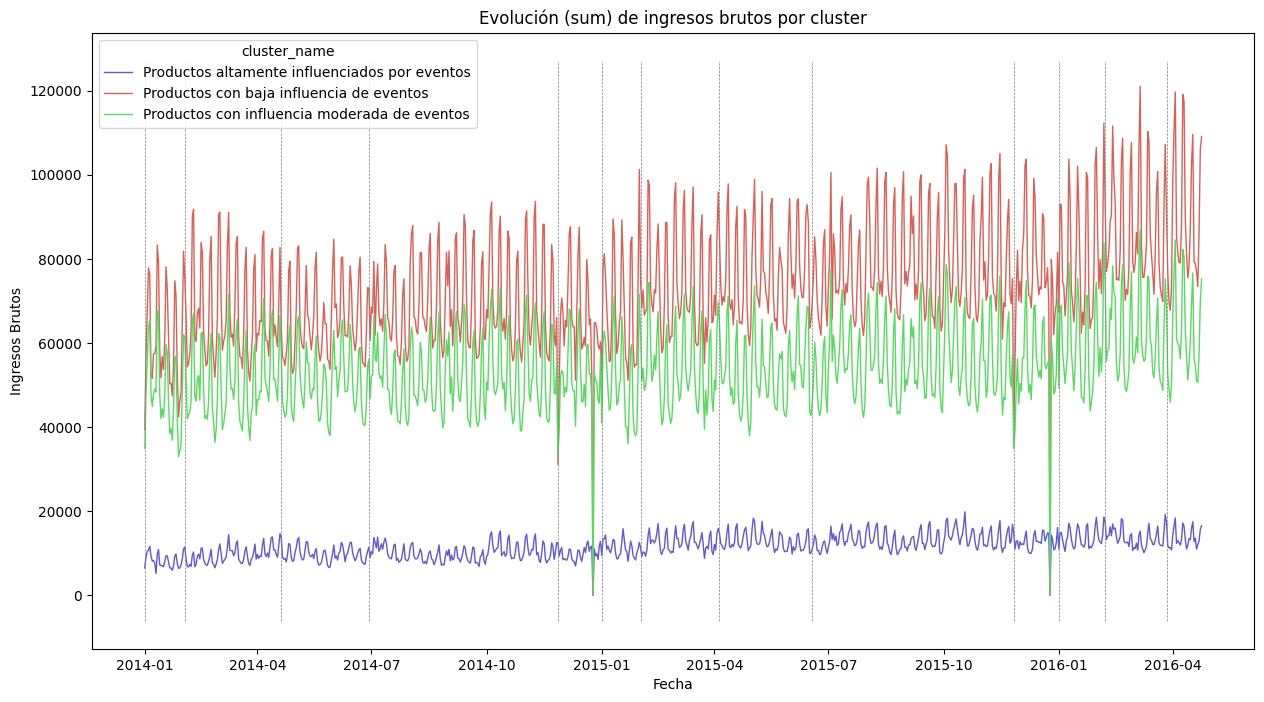

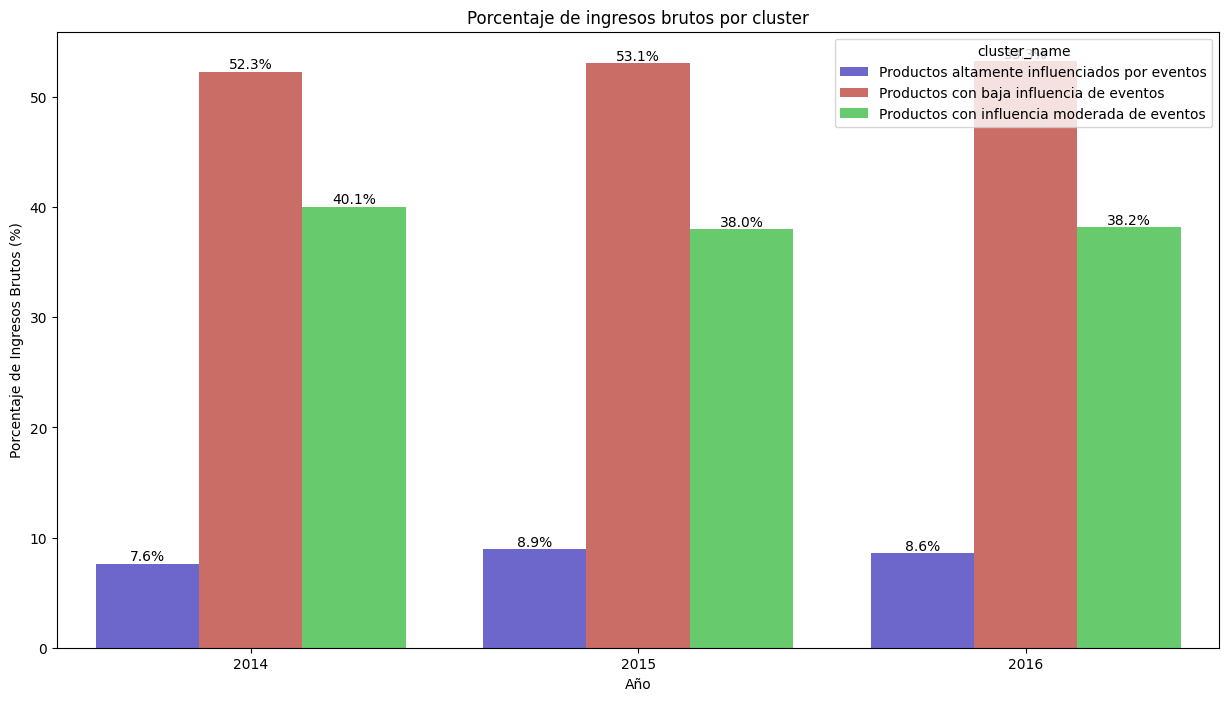

In [19]:
df_filt = df[df['year'].isin([2014, 2015, 2016])]

# Llamada a la función para graficar ingresos brutos
plot_evolution(
    data=df_filt,
    date_col='date',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Evolución (sum) de ingresos brutos por cluster',
    ylabel='Ingresos Brutos',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de ingresos brutos por año
plot_percentage_bars(
    data=df_filt,
    year_col='year',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Porcentaje de ingresos brutos por cluster',
    ylabel='Porcentaje de Ingresos Brutos (%)',
    figsize=FIGSIZE
)

#### Rango de precios

In [20]:
# Borramos columnas de cluster de productos sobre performance general de ventas
df = df.drop(columns=['cluster', 'cluster_name'])

# Cargamos clusters influencia eventos sobre ventas
cl_items_price_range = get_data('_clusters/items_clusters_price_range.csv')

# Añadimos columnas a df principal
df = df.merge(cl_items_price_range[['item', 'cluster', 'cluster_name']], on=['item'], how='left')

display(df.head())


item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        0   
1   13.2202      1  Wednesday               2  NewYear        0   
2    8.8844      1  Wednesday               2  NewYear        0   
3    2.7664      1  Wednesday               2  NewYear        1   
4    3.8304      1  Wednesday               2  NewYear        0   

                         cluster_name  
0        Productos de precio moderado  
1        Productos de precio moderado  
2        Productos de precio moderado  
3  Productos de precio bajo o volátil  
4        Productos de precio moderado

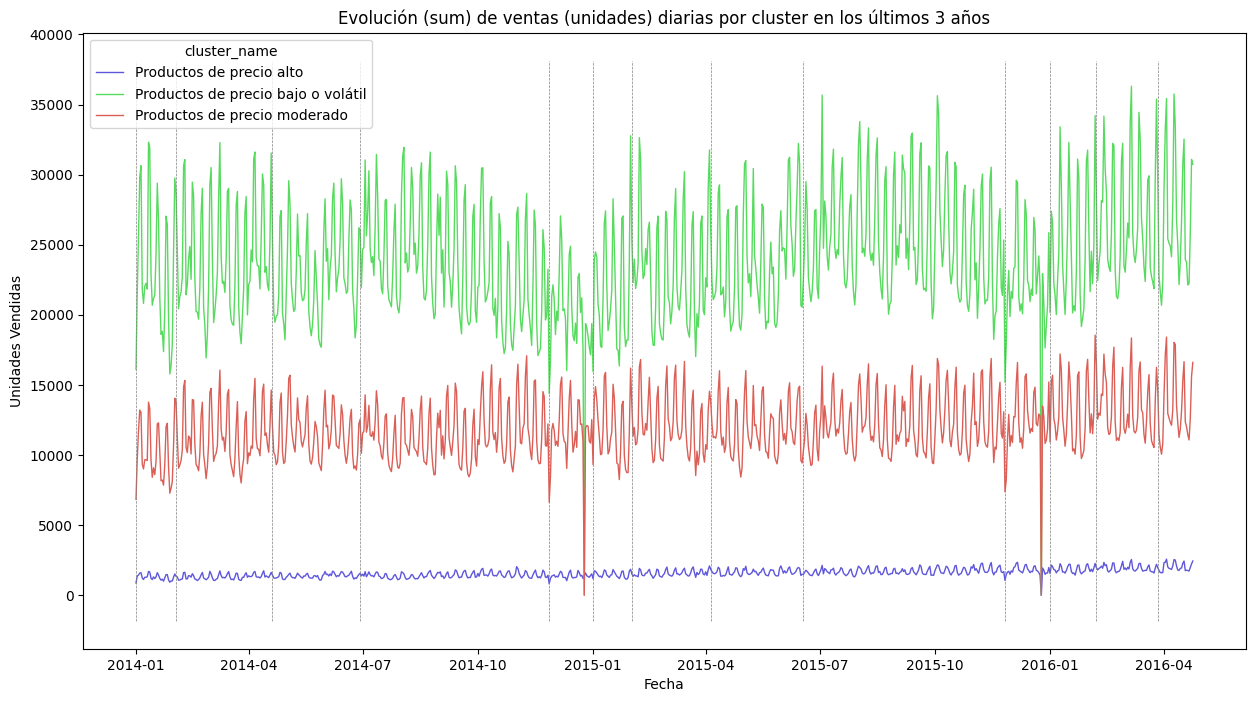

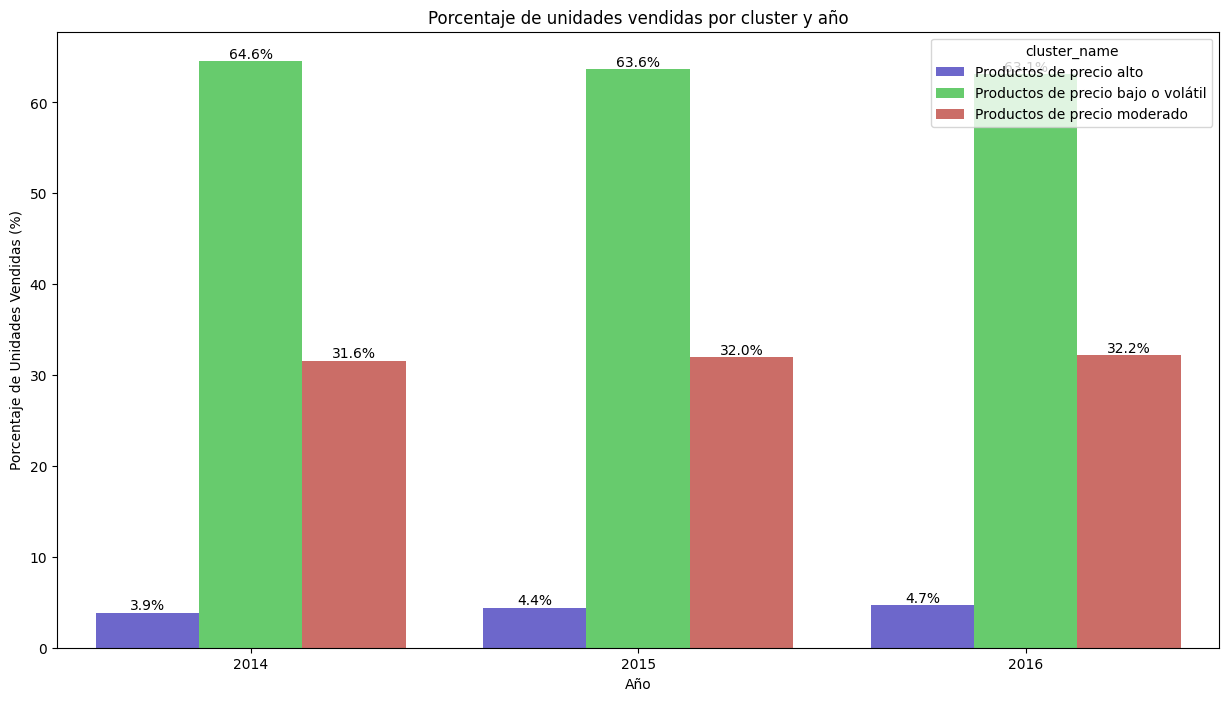

In [21]:
# Llamada a la función para graficar unidades vendidas
plot_evolution(
    data=df,
    date_col='date',
    group_col='cluster_name',
    value_col='units',
    title='Evolución (sum) de ventas (unidades) diarias por cluster en los últimos 3 años',
    ylabel='Unidades Vendidas',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de unidades vendidas por año
plot_percentage_bars(
    data=df,
    year_col='year',
    group_col='cluster_name',
    value_col='units',
    title='Porcentaje de unidades vendidas por cluster y año',
    ylabel='Porcentaje de Unidades Vendidas (%)',
    figsize=FIGSIZE

  )

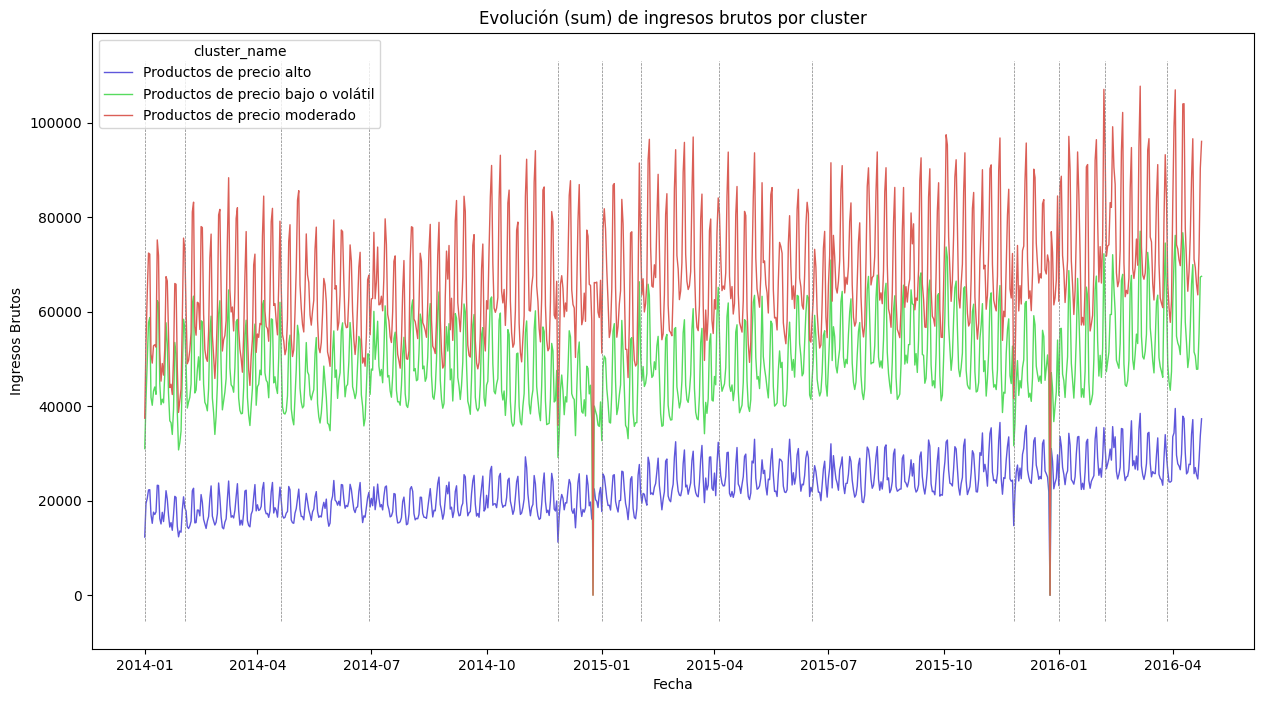

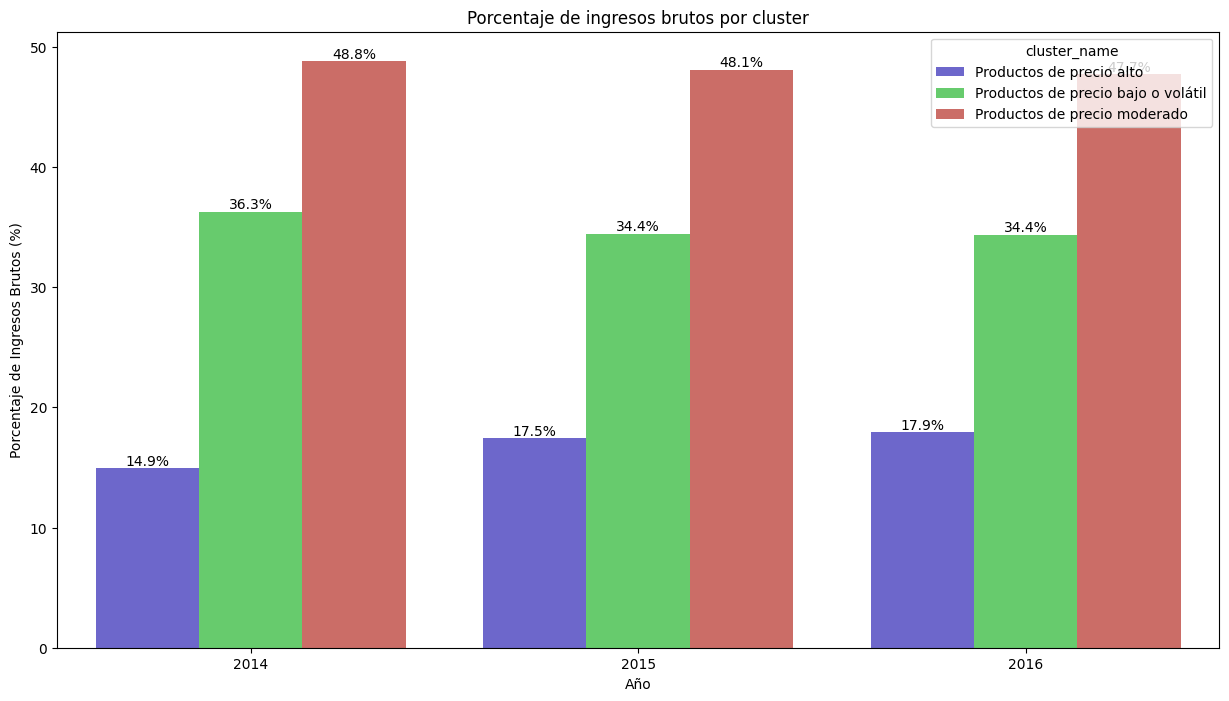

In [22]:
df_filt = df[df['year'].isin([2014, 2015, 2016])]

# Llamada a la función para graficar ingresos brutos
plot_evolution(
    data=df_filt,
    date_col='date',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Evolución (sum) de ingresos brutos por cluster',
    ylabel='Ingresos Brutos',
    linewidth=1,
    agg='sum',
    figsize=FIGSIZE
)

# Llamada a la función para graficar el porcentaje de ingresos brutos por año
plot_percentage_bars(
    data=df_filt,
    year_col='year',
    group_col='cluster_name',
    value_col='raw_earn',
    title='Porcentaje de ingresos brutos por cluster',
    ylabel='Porcentaje de Ingresos Brutos (%)',
    figsize=FIGSIZE
)

### Por cluster de tiendas

#### Funciones

In [23]:
def plot_cluster_trend(data, column='units', agg_func='mean', cluster_col='s_cluster_name'):
    """
    Genera un gráfico de líneas para la evolución de la media o suma de 'units' o 'raw_earn' por cluster_col agrupado por 'store_code'.

    Parameters:
    - data: DataFrame con los datos.
    - column: Columna a analizar ('units' o 'raw_earn').
    - agg_func: Tipo de agregación a aplicar ('mean' o 'sum').
    """
    # Agrupar por cluster y fecha, aplicando la función de agregación
    agg_df = data.groupby([cluster_col, 'date']).agg({column: agg_func}).reset_index()

    # Pivoteamos los datos para tener un formato adecuado para la gráfica
    pivot_df = agg_df.pivot_table(index='date', columns=[cluster_col], values=column)

    # Generar una paleta de colores consistente para los clusters
    palette = get_cluster_palette(data, cluster_col)

    # Pintar el gráfico con la paleta 'bright'
    ax = pivot_df.plot(figsize=FIGSIZE, color=palette, linewidth=1)

    # Agregar líneas verticales discontinuas en los días donde 'event' != 'None'
    event_days = data[data['event'] != 'None']['date'].unique()
    for event_day in event_days:
        plt.axvline(pd.to_datetime(event_day), color='grey', linestyle='--', linewidth=0.5)

    # Configurar títulos y etiquetas
    plt.title(f'Evolución de la {agg_func} de {column} por cluster_col')
    plt.ylabel(f'{agg_func.capitalize()} de {column}')
    plt.xlabel('Fecha')
    plt.xticks(rotation=45)

    # Colocar la leyenda dentro del gráfico
    plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

def plot_sales_distribution_by_cluster(data, column='units', cluster_col='s_cluster_name'):
    """
    Genera un gráfico de barras que muestra el porcentaje de 'units' o 'raw_earn' por cluster_col para cada 'store_code' y año.

    Parameters:
    - data: DataFrame con los datos.
    - column: Columna a analizar ('units' o 'raw_earn').
    """
    # Crear una columna 'year' para extraer el año de la fecha
    data['year'] = pd.to_datetime(data['date']).dt.year

    # Agrupar por año y cluster, sumando la columna especificada (units o raw_earn)
    sales_df = data.groupby(['year', cluster_col]).agg({column: 'sum'}).reset_index()

    # Calcular el total de ventas/ganancias por año
    total_sales_df = sales_df.groupby(['year'])[column].transform('sum')

    # Calcular el porcentaje que representa cada cluster
    sales_df['sales_percentage'] = (sales_df[column] / total_sales_df) * 100

    # Generar una paleta de colores consistente para los clusters
    palette = get_cluster_palette(data, cluster_col)

    # Crear gráfico de barras con la paleta 'bright'
    ax = sales_df.pivot_table(index='year', columns=[cluster_col], values='sales_percentage').plot(
        kind='bar', figsize=FIGSIZE, color=palette)

    # Añadir los valores porcentuales encima de cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

    # Títulos y etiquetas
    plt.title(f'Porcentaje de {column} por cluster_col por tienda y año')
    plt.ylabel(f'Porcentaje de {column} (%)')
    plt.xlabel('Año')

    # Colocar la leyenda dentro del gráfico
    plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


#### Performance general de ventas

In [24]:
# Borramos columnas de cluster de productos sobre performance general de ventas
df = df.drop(columns=['cluster', 'cluster_name'])

# Añadimos clusters de tiendas => s_cluster y s_cluster_name
cl_shops_sales = get_data('_clusters/shops_global_sales_performance.csv')

# # Añadimos la columna event al df principal de ventas diarias
df = df.merge(cl_shops_sales[['store_code', 'cluster', 'cluster_name']], on=['store_code'], how='left')

In [25]:
display(df.head())

item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        1   
1   13.2202      1  Wednesday               2  NewYear        1   
2    8.8844      1  Wednesday               2  NewYear        1   
3    2.7664      1  Wednesday               2  NewYear        1   
4    3.8304      1  Wednesday               2  NewYear        1   

                                 cluster_name  
0  Tiendas con rendimiento promedio en ventas  
1  Tiendas con rendimiento promedio en ventas  
2  Tiendas con rendimiento promedio en ventas  
3  Tiendas con rendimiento promedio en ventas  
4  Tiendas con rendimiento promedio en ventas

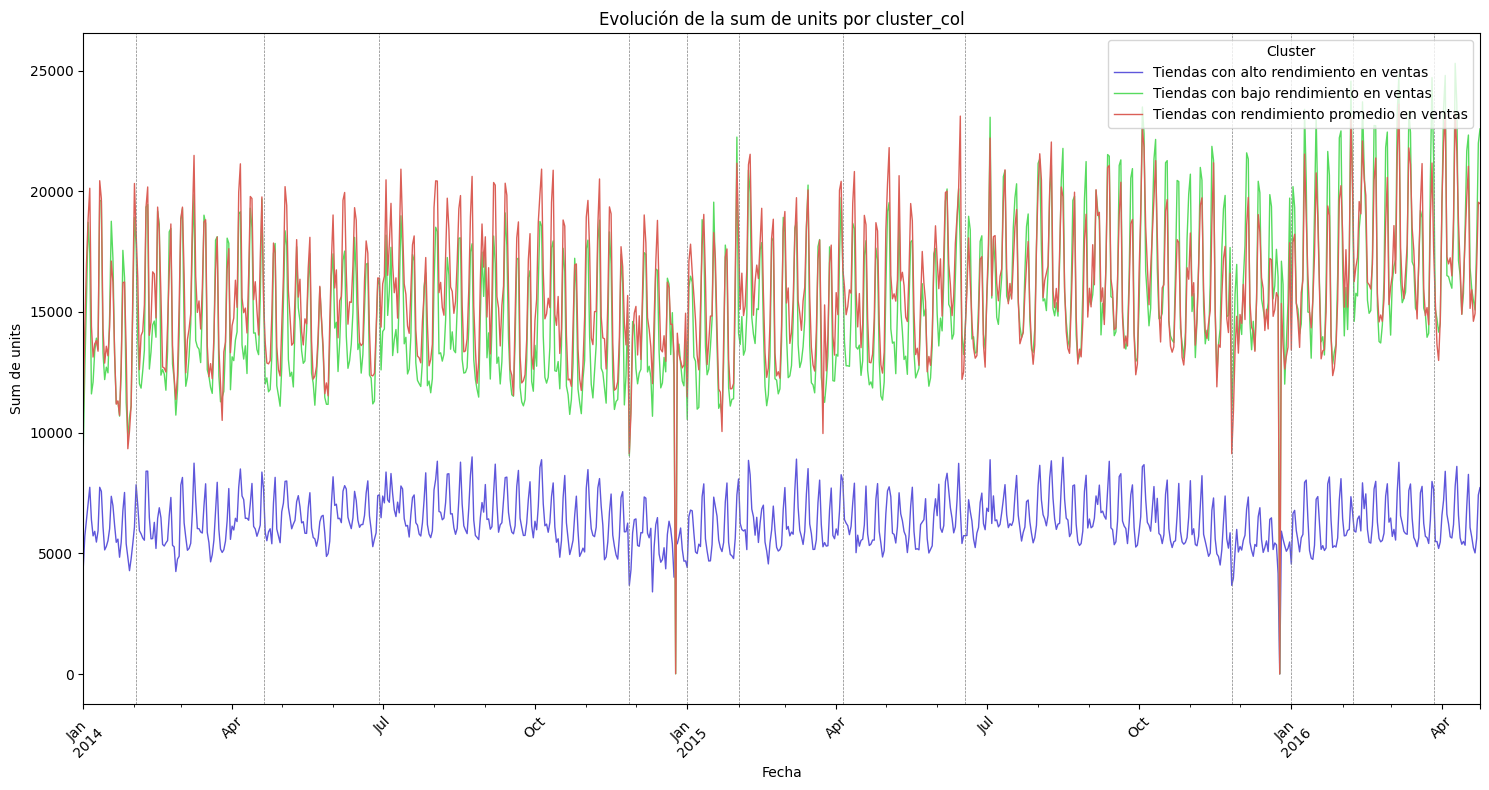

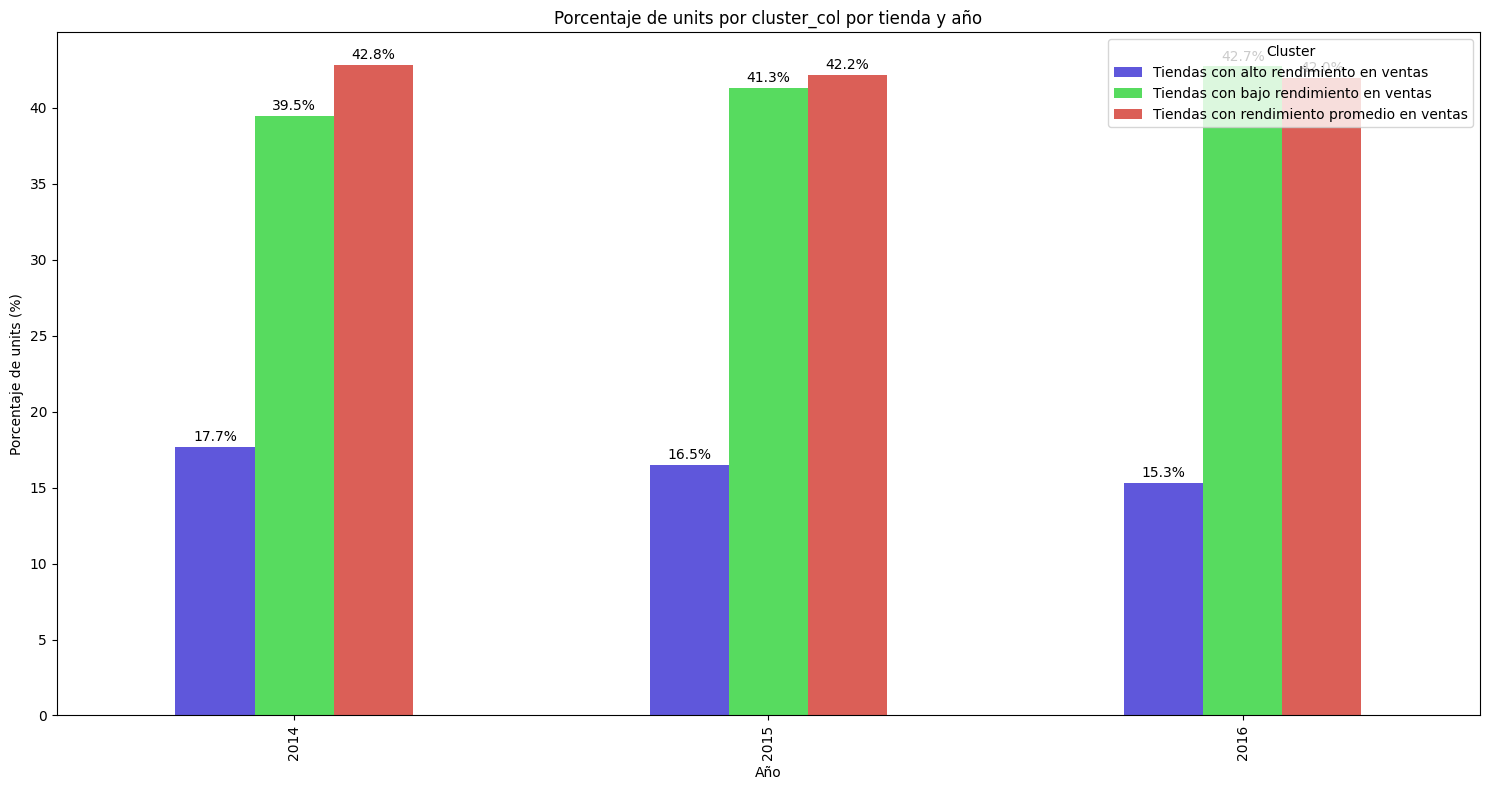

In [26]:
plot_cluster_trend(df, column='units', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='units', cluster_col='cluster_name')

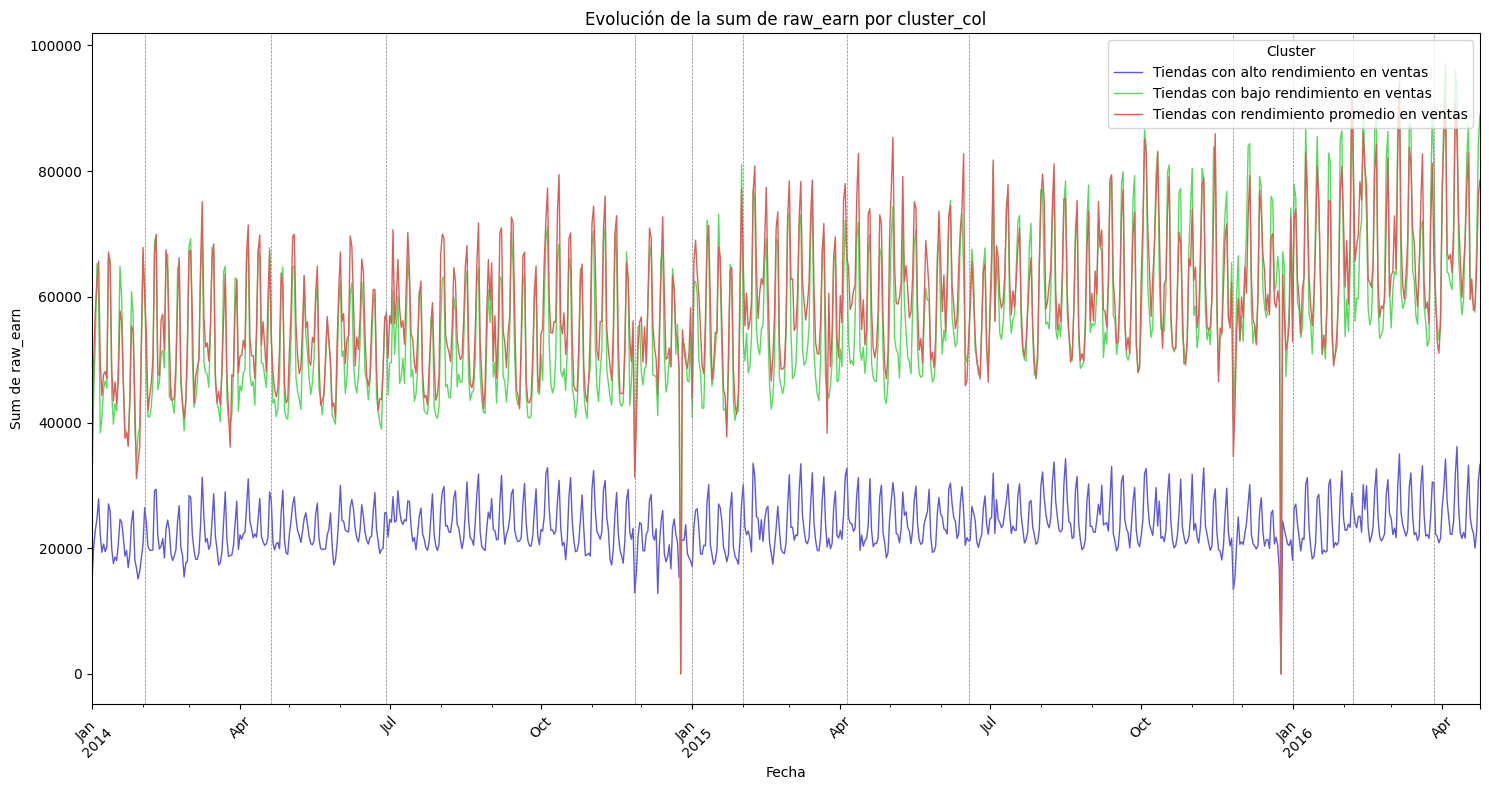

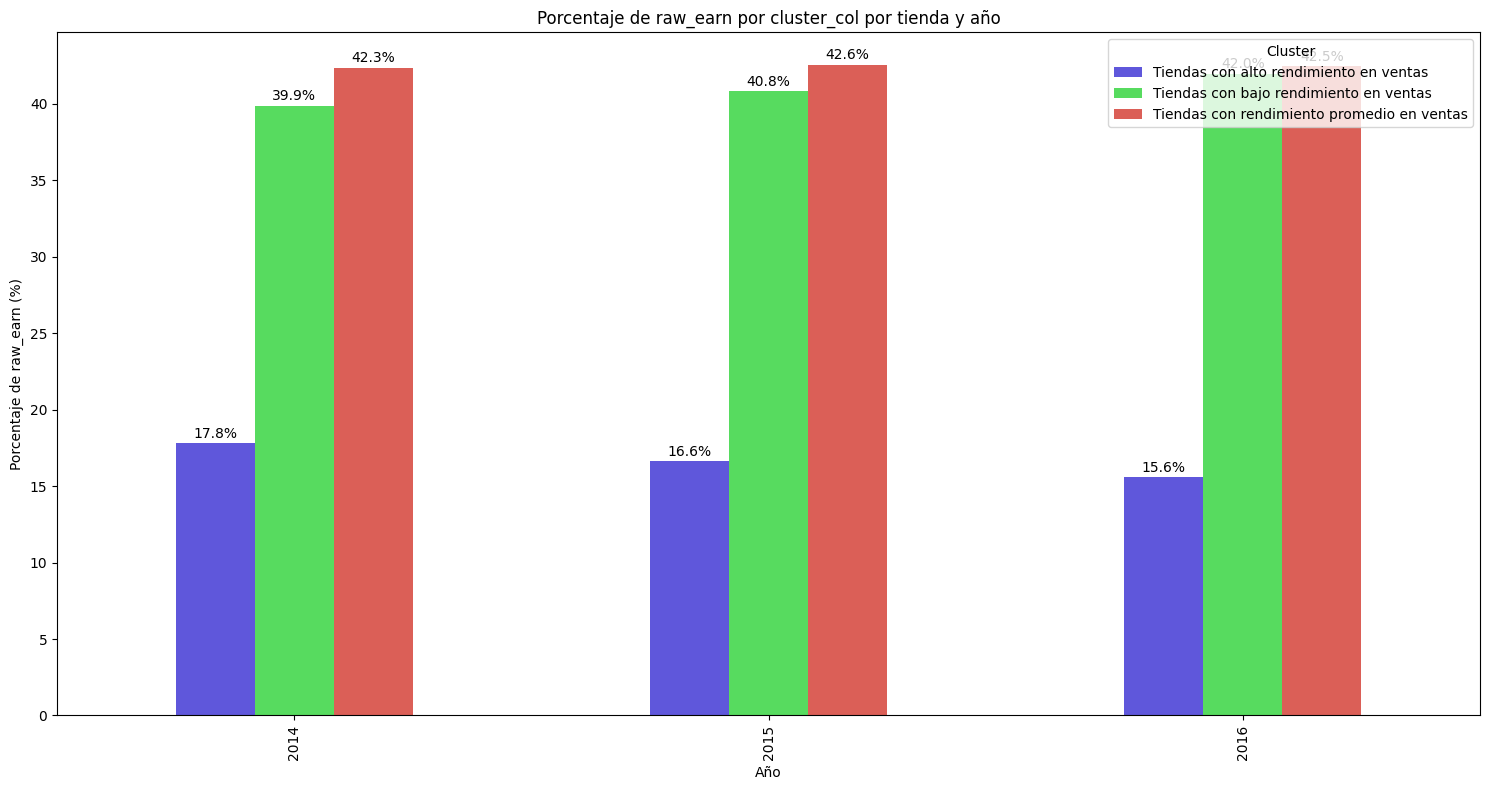

In [27]:
plot_cluster_trend(df, column='raw_earn', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='raw_earn', cluster_col='cluster_name')

#### Mix de productos

In [30]:
# Borramos columnas de cluster de productos sobre performance general de ventas
df = df.drop(columns=['cluster', 'cluster_name'])

# Añadimos clusters de tiendas => s_cluster y s_cluster_name
cl_shops_mixp = get_data('_clusters/shops_products_mix.csv')

# # Añadimos la columna event al df principal de ventas diarias
df = df.merge(cl_shops_mixp[['store_code', 'cluster', 'cluster_name']], on=['store_code'], how='left')

display(df.head())

item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        1   
1   13.2202      1  Wednesday               2  NewYear        1   
2    8.8844      1  Wednesday               2  NewYear        1   
3    2.7664      1  Wednesday               2  NewYear        1   
4    3.8304      1  Wednesday               2  NewYear        1   

                                      cluster_name  
0  Tiendas con productos de rendimiento intermedio  
1  Tiendas con productos de rendimiento intermedio  
2  Tiendas con productos de rendimiento intermedio  
3  Tiendas con productos de rendimiento intermedio  
4  Tiendas con productos de rendimiento intermedio

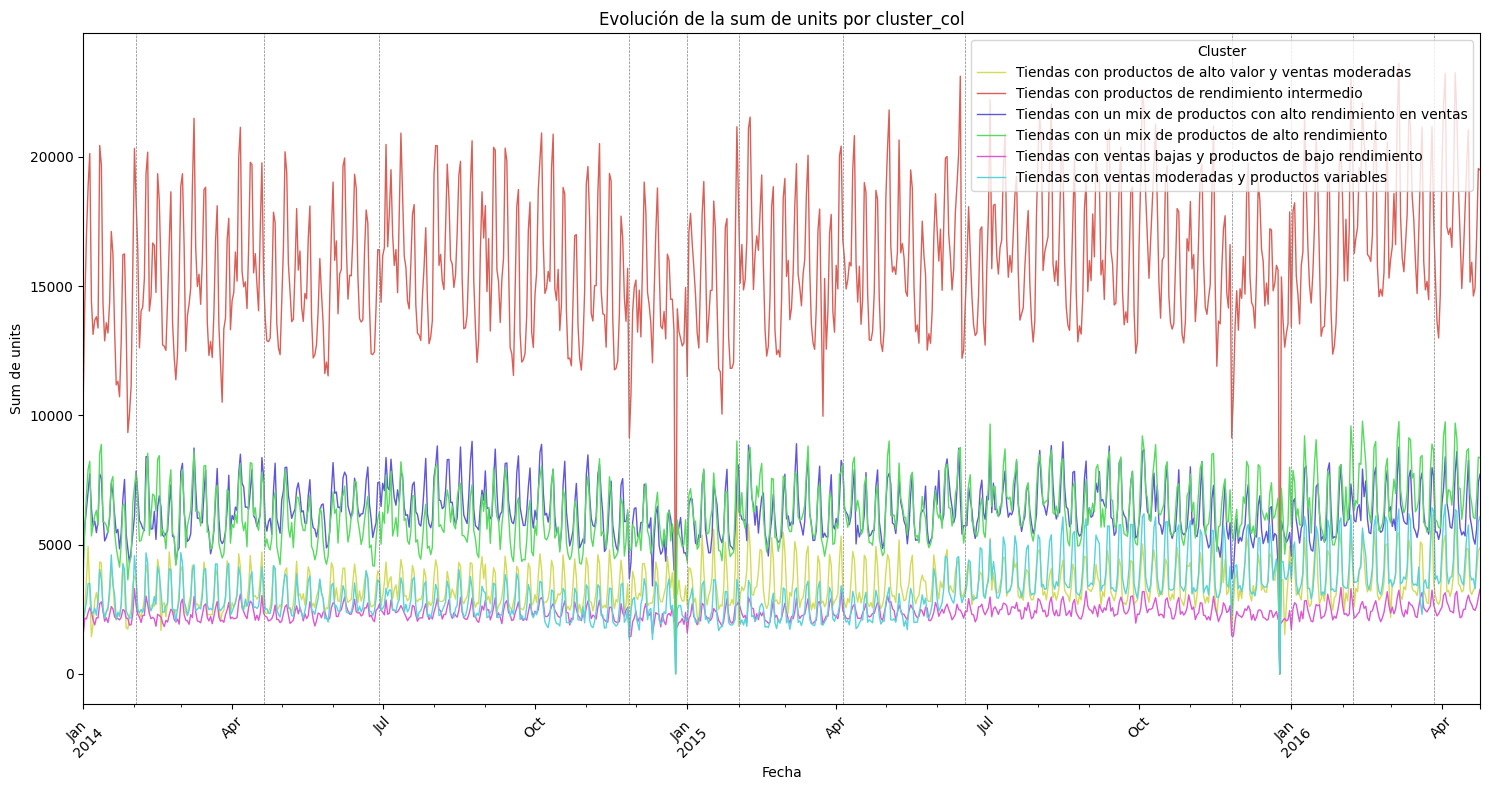

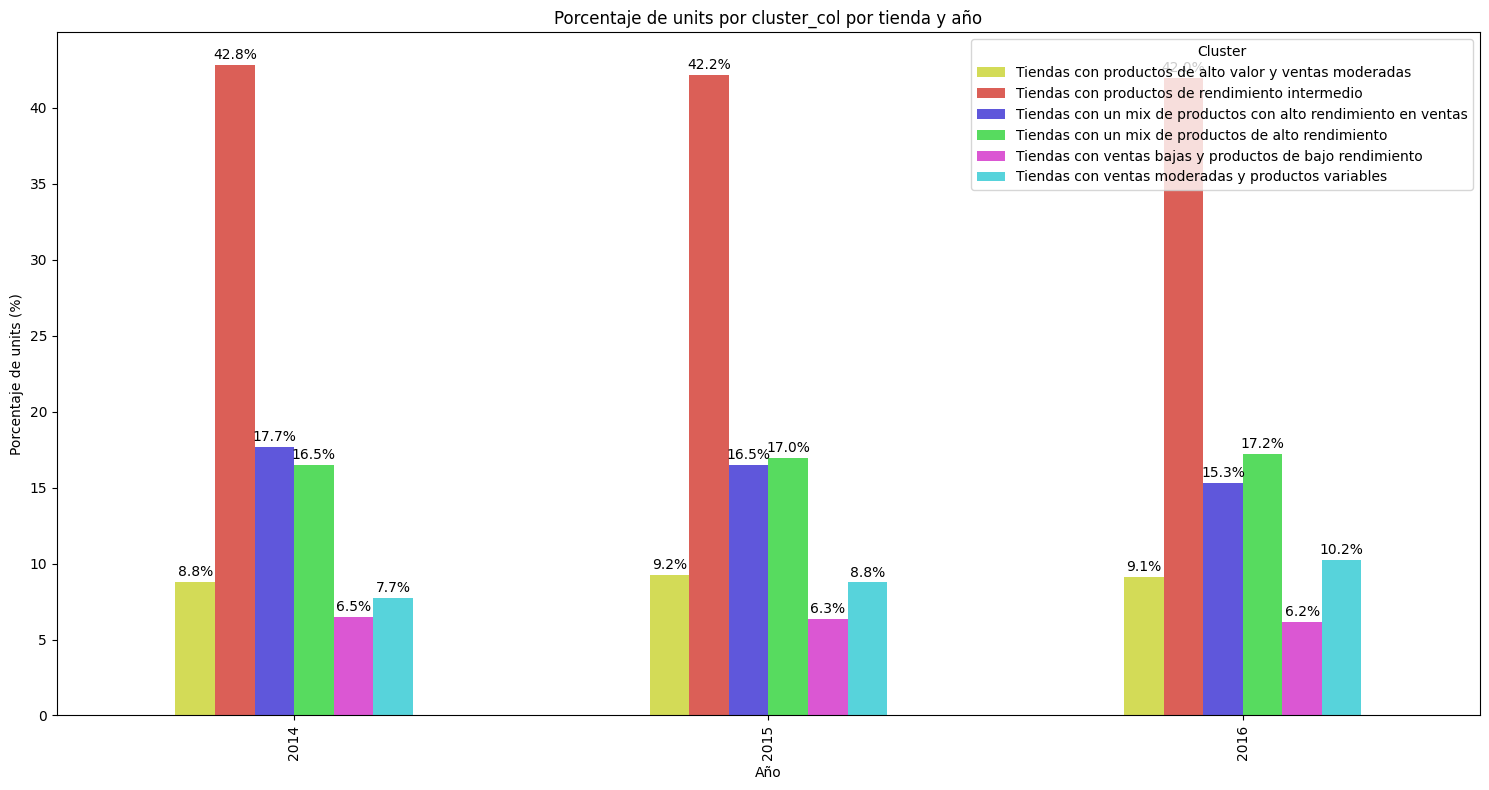

In [31]:
plot_cluster_trend(df, column='units', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='units', cluster_col='cluster_name')

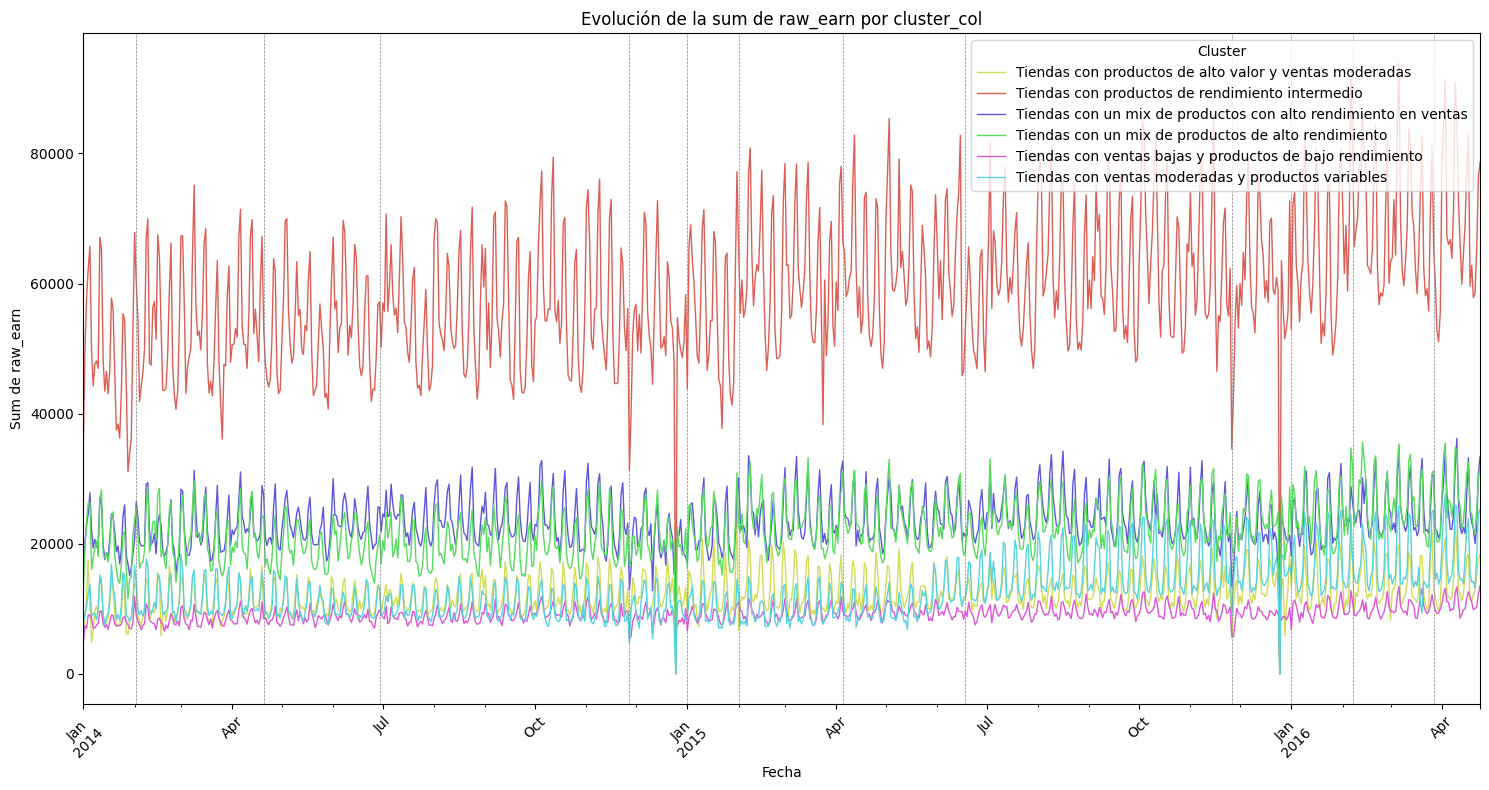

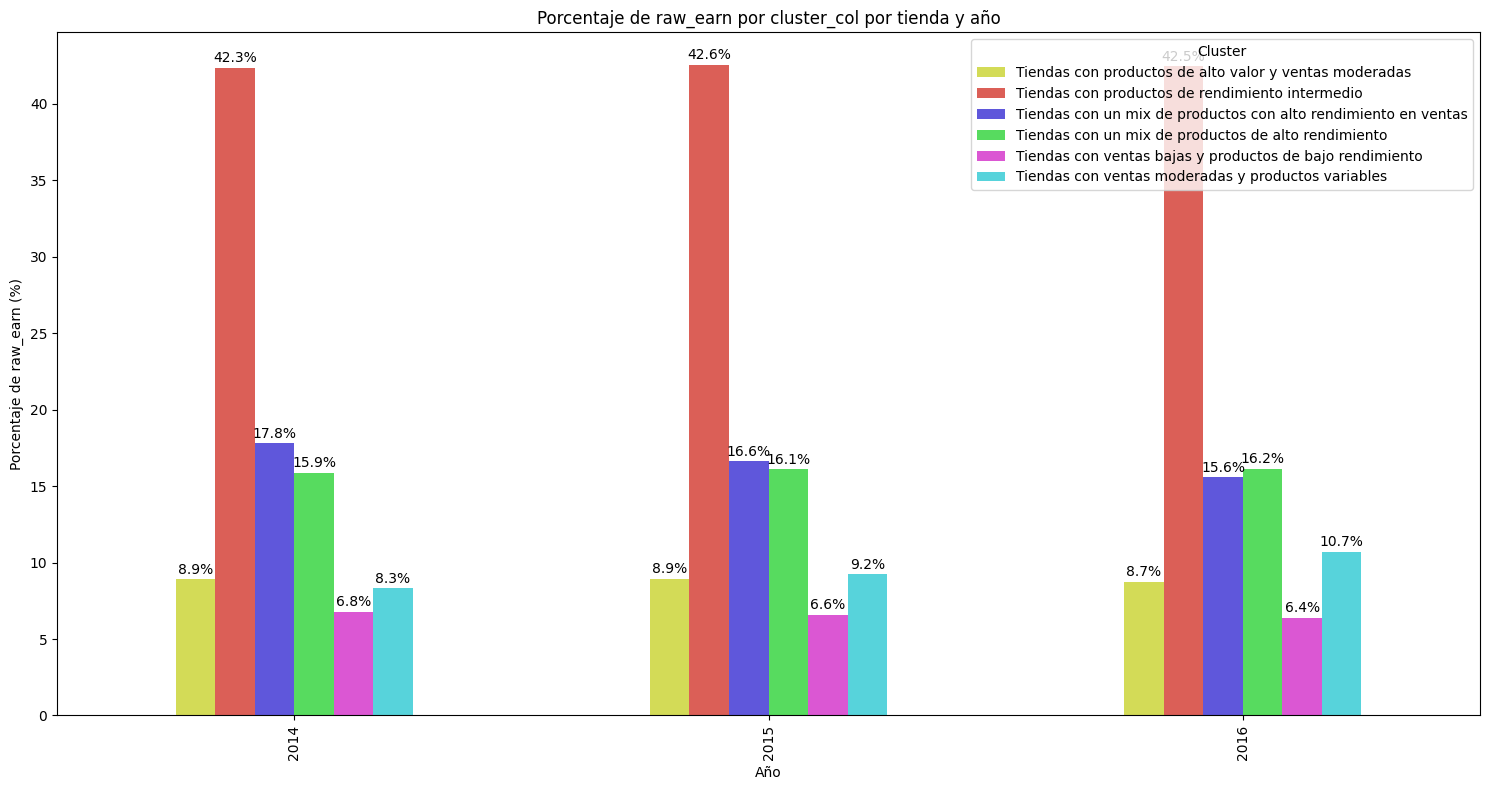

In [32]:
plot_cluster_trend(df, column='raw_earn', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='raw_earn', cluster_col='cluster_name')

#### Influencia eventos en ventas

In [33]:
# Borramos columnas de cluster de productos sobre performance general de ventas
df = df.drop(columns=['cluster', 'cluster_name'])

# Añadimos clusters de tiendas => s_cluster y s_cluster_name
cl_shops_sales_events = get_data('_clusters/shops_clusters_events_influence_sales.csv')

cl_shops_sales_events = cl_shops_sales_events.rename(columns={'Cluster':'cluster'})

# # Añadimos la columna event al df principal de ventas diarias
df = df.merge(cl_shops_sales_events[['store_code', 'cluster', 'cluster_name']], on=['store_code'], how='left')

display(df.head())

item store_code       date  units  year  week  sell_price  \
0  ACCESORIES_1_419      BOS_3 2014-01-01      1  2014     1      7.9534   
1  ACCESORIES_1_416      BOS_3 2014-01-01      2  2014     1      6.6101   
2  ACCESORIES_1_415      BOS_3 2014-01-01      1  2014     1      8.8844   
3  ACCESORIES_1_412      BOS_3 2014-01-01      1  2014     1      2.7664   
4  ACCESORIES_1_407      BOS_3 2014-01-01      1  2014     1      3.8304   

   raw_earn  month   day_name  weekday_number    event  cluster  \
0    7.9534      1  Wednesday               2  NewYear        2   
1   13.2202      1  Wednesday               2  NewYear        2   
2    8.8844      1  Wednesday               2  NewYear        2   
3    2.7664      1  Wednesday               2  NewYear        2   
4    3.8304      1  Wednesday               2  NewYear        2   

                                        cluster_name  
0  Tiendas con ventas estables pero menor depende...  
1  Tiendas con ventas estables pero menor depende...  
2  Tiendas con ventas estables pero menor depende...  
3  Tiendas con ventas estables pero menor depende...  
4  Tiendas con ventas estables pero menor depende...

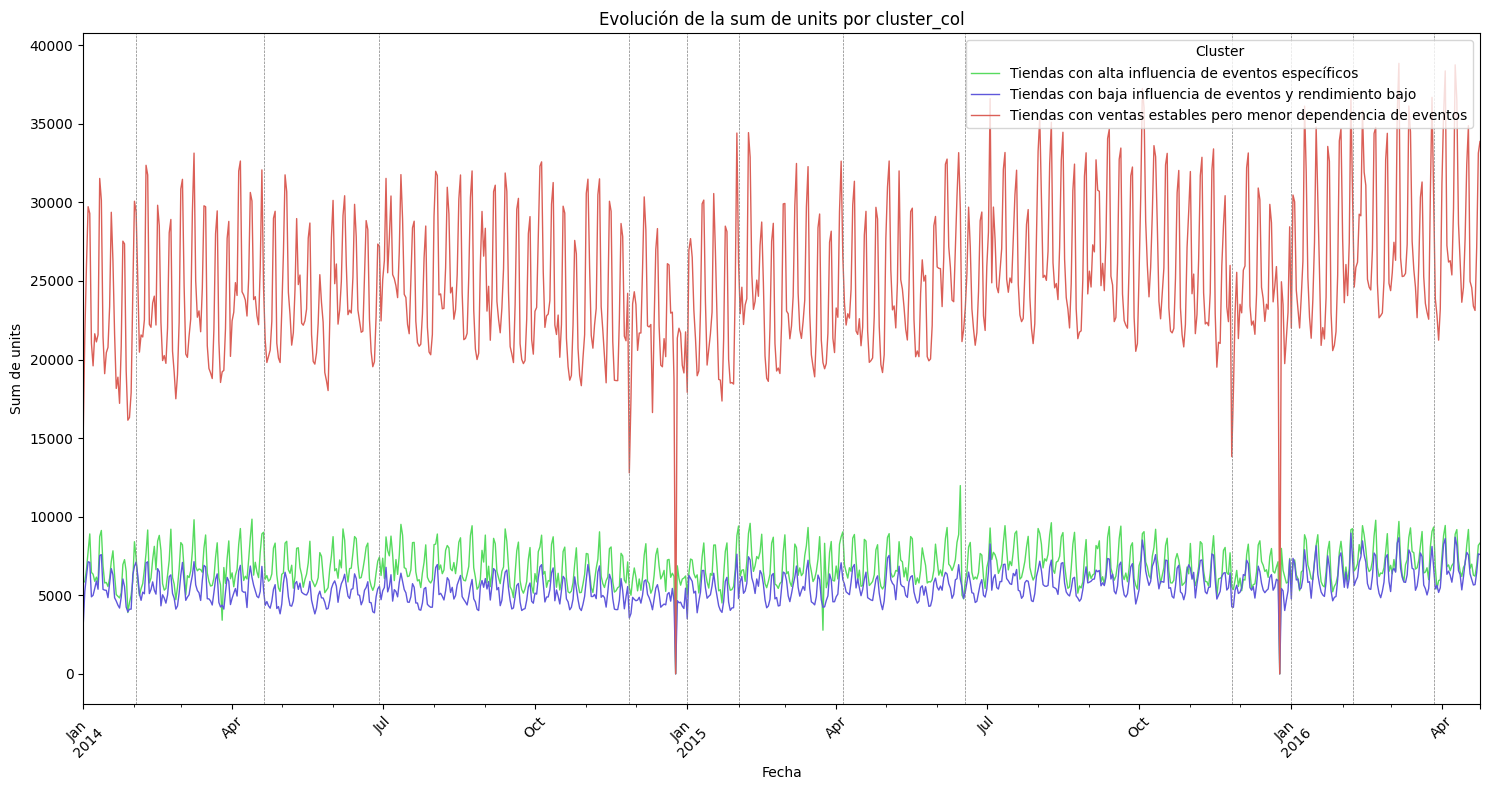

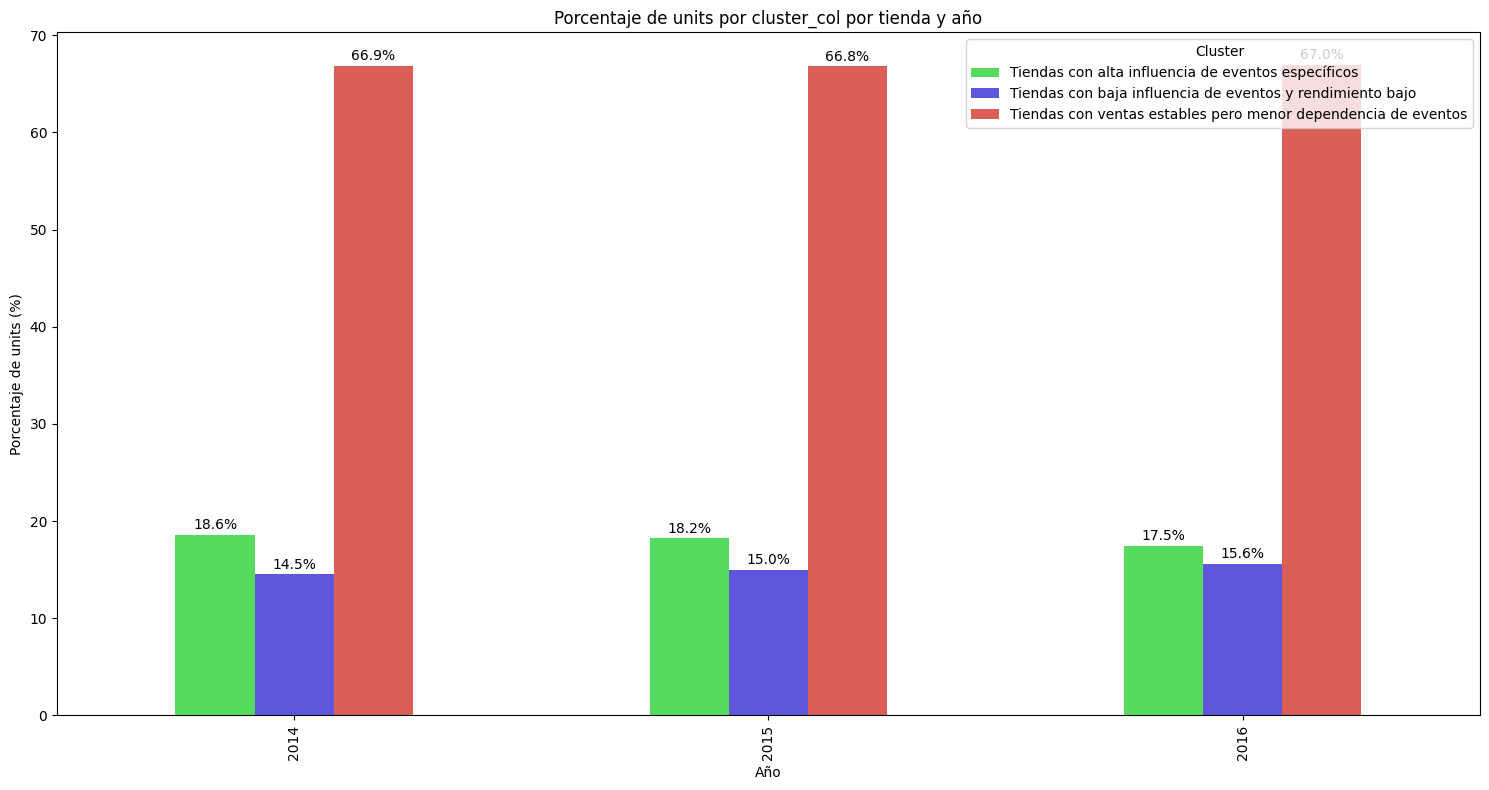

In [34]:
plot_cluster_trend(df, column='units', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='units', cluster_col='cluster_name')

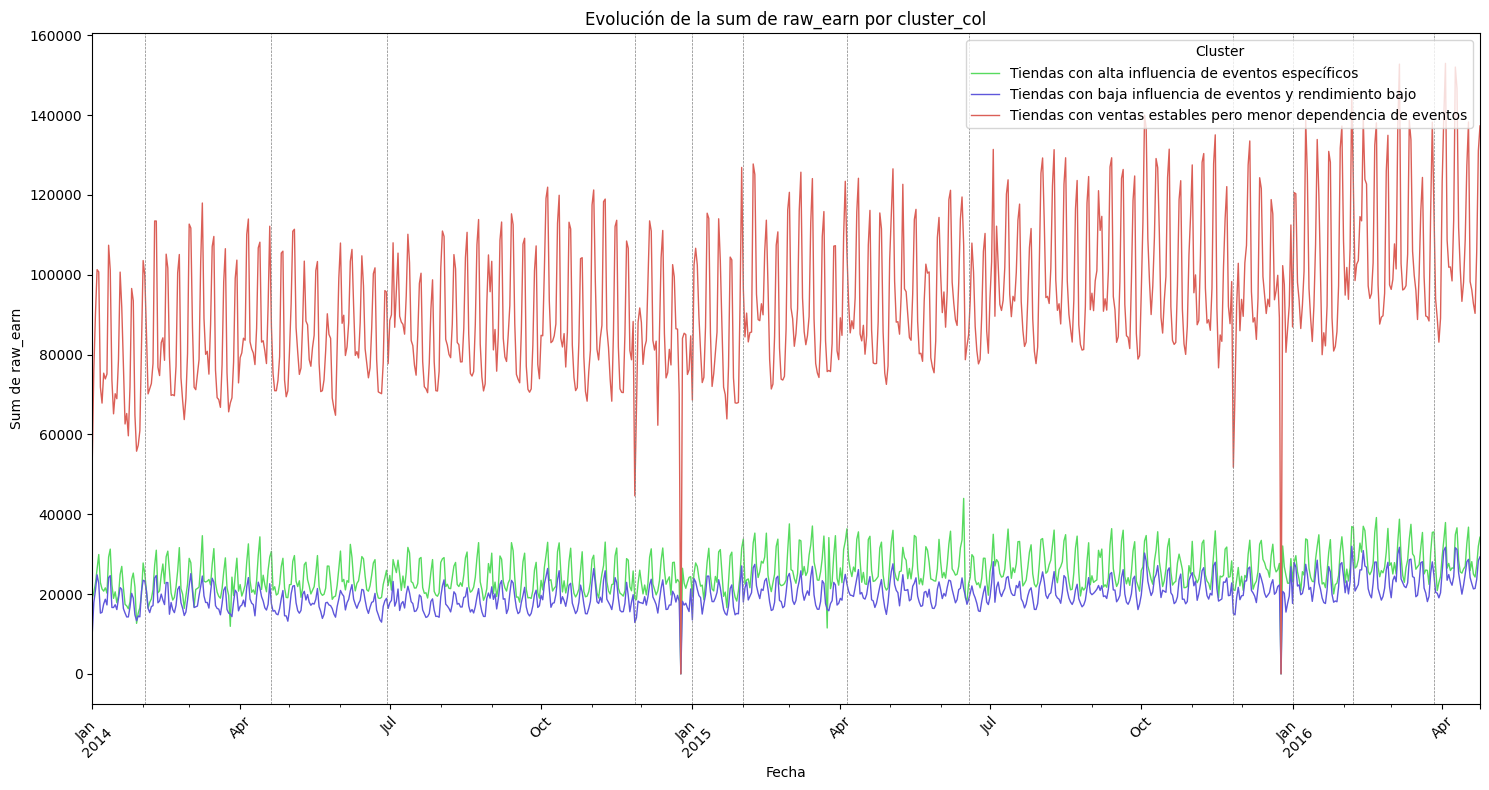

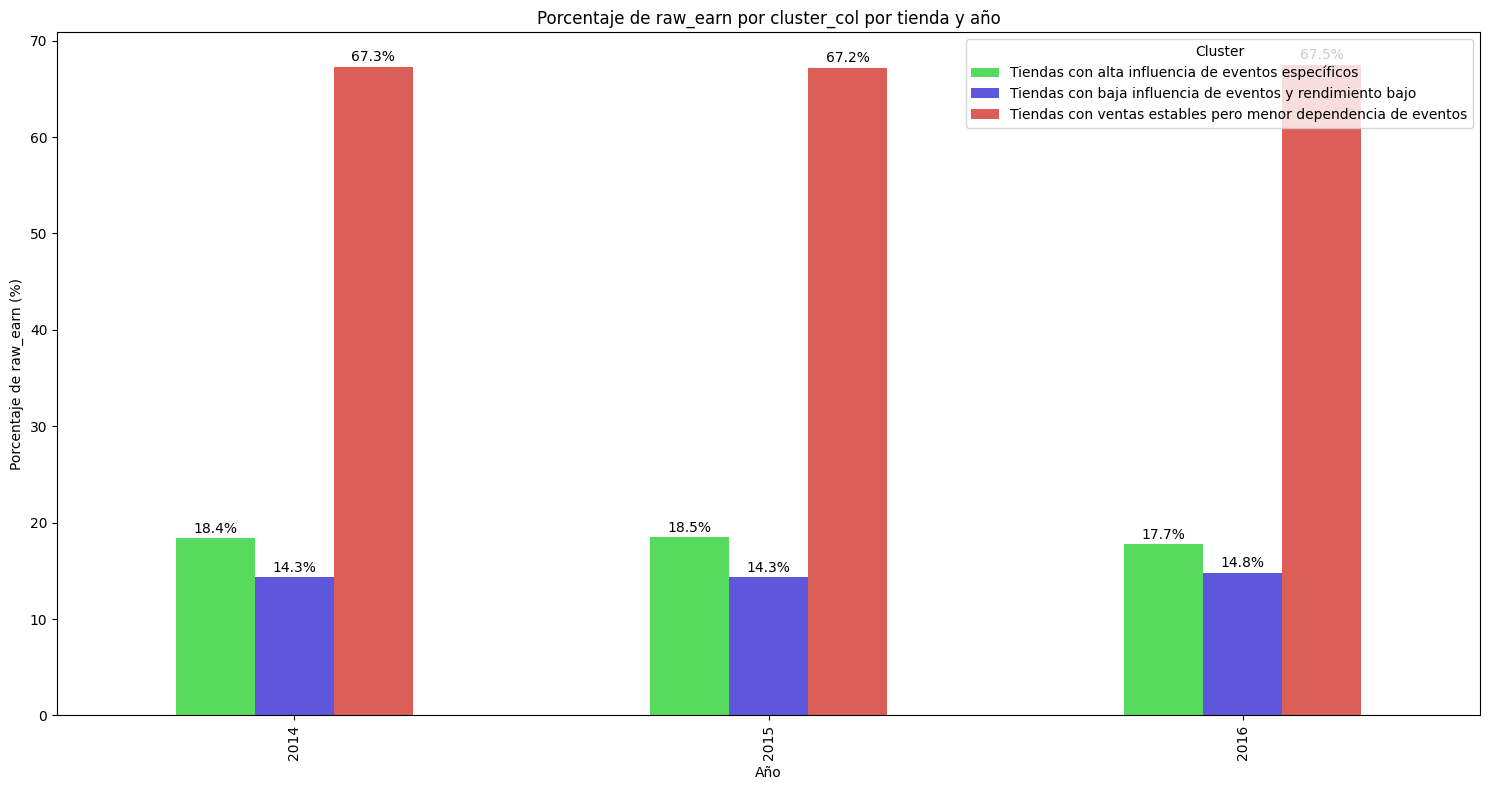

In [35]:
plot_cluster_trend(df, column='raw_earn', agg_func='sum', cluster_col='cluster_name')
plot_sales_distribution_by_cluster(df, column='raw_earn', cluster_col='cluster_name')